In [ ]:
!pip install --upgrade numexpr

In [ ]:
!pip install pandas
!pip install nltk
!pip install wordcloud
!pip install mplcursors
!pip install seaborn
!pip install graphviz
!pip install wordtree
!pip install textblob
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21168 sha256=8254a892f027b2a09dea1eb851ff5e861873084a72c3478cadfc6d704b79c3f5
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors
2023-11-30 03:58:03.358343: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 03:58:03.358411: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 03:58:03.358452: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory f

In [ ]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import mplcursors
import matplotlib.image as mpimg
import wordtree
import os
import matplotlib
import re
import spacy
from textblob import TextBlob, Word
from tqdm import tqdm

nltk.download(['punkt','stopwords','wordnet','omw-1.4','averaged_perceptron_tagger'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
csv_file = '/content/final_merged.csv'
df = pd.read_csv(csv_file)
df

,id,prompt_id,text,generated
0,0059830c,0.0,Cars. Cars have been around since they became ...,0
1,005db917,0.0,Transportation is a large necessity in most co...,0
2,008f63e3,0.0,"""America's love affair with it's vehicles seem...",0
3,00940276,0.0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0.0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
30518,NaN,NaN,There has been a fuss about the Elector Colleg...,0
30519,NaN,NaN,Limiting car usage has many advantages. Such a...,0
30520,NaN,NaN,There's a new trend that has been developing f...,0
30521,NaN,NaN,As we all know cars are a big part of our soci...,0


In [ ]:
df = df.drop_duplicates(subset='text', keep='first')
df

,id,prompt_id,text,generated
0,0059830c,0.0,Cars. Cars have been around since they became ...,0
1,005db917,0.0,Transportation is a large necessity in most co...,0
2,008f63e3,0.0,"""America's love affair with it's vehicles seem...",0
3,00940276,0.0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0.0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
29140,NaN,NaN,Today's society is ever-evolving and the role ...,1
29141,NaN,NaN,The ever-evolving world of technology has chan...,1
29142,NaN,NaN,Fostering a Rescue Dog: Gaining Unconditional ...,1
29143,NaN,NaN,The importance of a solid foundation in educat...,1


In [ ]:
df['generated'].value_counts()

0    16122
1    11218
Name: generated, dtype: int64

In [ ]:
nltk.download('punkt')  # Download the Punkt tokenizer

# Tokenize your text
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization to your DataFrame
df['tokenized_text'] = df['text'].apply(tokenize_text)

df['tokenized_text']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-7-7bc3129867bb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_text'] = df['text'].apply(tokenize_text)


0        [Cars, ., Cars, have, been, around, since, the...
1        [Transportation, is, a, large, necessity, in, ...
2        [``, America, 's, love, affair, with, it, 's, ...
3        [How, often, do, you, ride, in, a, car, ?, Do,...
4        [Cars, are, a, wonderful, thing, ., They, are,...
                               ...                        
29140    [Today, 's, society, is, ever-evolving, and, t...
29141    [The, ever-evolving, world, of, technology, ha...
29142    [Fostering, a, Rescue, Dog, :, Gaining, Uncond...
29143    [The, importance, of, a, solid, foundation, in...
29144    [Over, the, last, decade, ,, cities, around, t...
Name: tokenized_text, Length: 27340, dtype: object

In [8]:
nltk.download('averaged_perceptron_tagger')  # Download the POS tagger model

# Perform POS tagging
def pos_tagging(tokens):
    return nltk.pos_tag(tokens)

# Apply POS tagging to your DataFrame
df['pos_tags'] = df['tokenized_text'].apply(pos_tagging)
df['pos_tags']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
<ipython-input-8-9d3245096739>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pos_tags'] = df['tokenized_text'].apply(pos_tagging)


0        [(Cars, NNS), (., .), (Cars, NNS), (have, VBP)...
1        [(Transportation, NN), (is, VBZ), (a, DT), (la...
2        [(``, ``), (America, NNP), ('s, POS), (love, N...
3        [(How, WRB), (often, RB), (do, VBP), (you, PRP...
4        [(Cars, NNS), (are, VBP), (a, DT), (wonderful,...
                               ...                        
29140    [(Today, NN), ('s, POS), (society, NN), (is, V...
29141    [(The, DT), (ever-evolving, JJ), (world, NN), ...
29142    [(Fostering, VBG), (a, DT), (Rescue, NNP), (Do...
29143    [(The, DT), (importance, NN), (of, IN), (a, DT...
29144    [(Over, IN), (the, DT), (last, JJ), (decade, N...
Name: pos_tags, Length: 27340, dtype: object

In [11]:
# Extract POS features
def extract_pos_features(pos_tags):
    pos_counts = {'NOUN': 0, 'VERB': 0, 'ADJ': 0, 'ADV': 0}  # Customize as needed

    for _, pos in pos_tags:
        if pos.startswith('N'):
            pos_counts['NOUN'] += 1
        elif pos.startswith('V'):
            pos_counts['VERB'] += 1
        elif pos.startswith('J'):
            pos_counts['ADJ'] += 1
        elif pos.startswith('R'):
            pos_counts['ADV'] += 1

    return pos_counts


# Apply feature extraction to your DataFrame
df['pos_features'] = df['pos_tags'].apply(extract_pos_features)

# Extract the counts for specific POS tags
noun_count = df['pos_features'].apply(lambda x: x['NOUN']).sum()
verb_count = df['pos_features'].apply(lambda x: x['VERB']).sum()
adj_count = df['pos_features'].apply(lambda x: x['ADJ']).sum()
adv_count = df['pos_features'].apply(lambda x: x['ADV']).sum()

print(f'NOUN count: {noun_count}')
print(f'VERB count: {verb_count}')
print(f'ADJ count: {adj_count}')
print(f'ADV count: {adv_count}')


NOUN count: 2602506
VERB count: 1961185
ADJ count: 895114
ADV count: 610319


<ipython-input-11-6f39884e4ecc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pos_features'] = df['pos_tags'].apply(extract_pos_features)


In [13]:
# Combine POS features with target labels
df_combined = pd.concat([df['pos_features'].apply(pd.Series), df['generated']], axis=1)

In [14]:
df_combined

,NOUN,VERB,ADJ,ADV,generated
0,173,118,46,22,0
1,152,87,38,21,0
2,215,144,74,43,0
3,179,143,61,39,0
4,235,173,64,70,0
...,...,...,...,...,...
29140,121,69,44,17,1
29141,103,65,42,23,1
29142,95,56,34,22,1
29143,81,47,31,22,1


In [21]:
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

# Function to perform NER
def ner(text, additional_column1, additional_column2):

    row_number = df.index[df['text'] == text].tolist()[0]
    if row_number % 1000 ==0:
      print(f'Processing row {row_number}')

    # Access another column's value
    words = df.loc[df['text'] == text, 'tokenized_text'].iloc[0]
    pos_tags = df.loc[df['text'] == text, 'pos_tags'].iloc[0]
    named_entities = nltk.ne_chunk(pos_tags, binary=False)
    named_entities_dict = {}

    for entity in named_entities.subtrees():
        if entity.label() != 'S':
            named_entities_dict[' '.join(c[0] for c in entity)] = entity.label()

    return named_entities_dict

# Apply NER to your DataFrame
df['ner_results'] = df.apply(lambda row: ner(row['text'], 'your_additional_column1_name','your_additional_column2_name'), axis=1)

# Combine POS features, NER entities, and additional features with target labels



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Processing row 0
Processing row 1000
Processing row 2000
Processing row 4000
Processing row 5000
Processing row 6000
Processing row 7000
Processing row 8000
Processing row 9000
Processing row 10000
Processing row 11000
Processing row 12000
Processing row 13000
Processing row 14000
Processing row 15000
Processing row 16000
Processing row 17000
Processing row 18000
Processing row 19000
Processing row 20000
Processing row 21000
Processing row 22000
Processing row 23000
Processing row 24000
Processing row 25000
Processing row 26000
Processing row 27000
Processing row 28000
Processing row 29000


<ipython-input-21-cfabb1a9c081>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ner_results'] = df.apply(lambda row: ner(row['text'], 'your_additional_column1_name','your_additional_column2_name'), axis=1)


KeyError: ignored

In [22]:
df

,id,prompt_id,text,generated,tokenized_text,pos_tags,pos_features,ner_results
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,"[Cars, ., Cars, have, been, around, since, the...","[(Cars, NNS), (., .), (Cars, NNS), (have, VBP)...","{'NOUN': 173, 'VERB': 118, 'ADJ': 46, 'ADV': 22}","{'Henry Ford': 'PERSON', 'ModelT': 'ORGANIZATI..."
1,005db917,0.0,Transportation is a large necessity in most co...,0,"[Transportation, is, a, large, necessity, in, ...","[(Transportation, NN), (is, VBZ), (a, DT), (la...","{'NOUN': 152, 'VERB': 87, 'ADJ': 38, 'ADV': 21}","{'Earth': 'LOCATION', 'Germany': 'GPE', 'Vauba..."
2,008f63e3,0.0,"""America's love affair with it's vehicles seem...",0,"[``, America, 's, love, affair, with, it, 's, ...","[(``, ``), (America, NNP), ('s, POS), (love, N...","{'NOUN': 215, 'VERB': 144, 'ADJ': 74, 'ADV': 43}","{'America': 'GPE', 'Elisabeth': 'PERSON', 'And..."
3,00940276,0.0,How often do you ride in a car? Do you drive a...,0,"[How, often, do, you, ride, in, a, car, ?, Do,...","[(How, WRB), (often, RB), (do, VBP), (you, PRP...","{'NOUN': 179, 'VERB': 143, 'ADJ': 61, 'ADV': 39}","{'Paris': 'PERSON', 'Bogota': 'GPE', 'Heidrun ..."
4,00c39458,0.0,Cars are a wonderful thing. They are perhaps o...,0,"[Cars, are, a, wonderful, thing, ., They, are,...","[(Cars, NNS), (are, VBP), (a, DT), (wonderful,...","{'NOUN': 235, 'VERB': 173, 'ADJ': 64, 'ADV': 70}","{'France': 'GPE', 'Paris': 'GPE', 'Roiert Duff..."
...,...,...,...,...,...,...,...,...
29140,NaN,NaN,Today's society is ever-evolving and the role ...,1,"[Today, 's, society, is, ever-evolving, and, t...","[(Today, NN), ('s, POS), (society, NN), (is, V...","{'NOUN': 121, 'VERB': 69, 'ADJ': 44, 'ADV': 17}","{'Facebook': 'ORGANIZATION', 'DDoS': 'ORGANIZA..."
29141,NaN,NaN,The ever-evolving world of technology has chan...,1,"[The, ever-evolving, world, of, technology, ha...","[(The, DT), (ever-evolving, JJ), (world, NN), ...","{'NOUN': 103, 'VERB': 65, 'ADJ': 42, 'ADV': 23}",{'International Renewable Energy Agency': 'ORG...
29142,NaN,NaN,Fostering a Rescue Dog: Gaining Unconditional ...,1,"[Fostering, a, Rescue, Dog, :, Gaining, Uncond...","[(Fostering, VBG), (a, DT), (Rescue, NNP), (Do...","{'NOUN': 95, 'VERB': 56, 'ADJ': 34, 'ADV': 22}",{'Life Lessons': 'PERSON'}
29143,NaN,NaN,The importance of a solid foundation in educat...,1,"[The, importance, of, a, solid, foundation, in...","[(The, DT), (importance, NN), (of, IN), (a, DT...","{'NOUN': 81, 'VERB': 47, 'ADJ': 31, 'ADV': 22}",{}


In [24]:
df.to_csv('final_features.csv',index=False)

In [25]:
df_combined_new = pd.concat([df_combined, df['ner_results']], axis=1)
df_combined_new

,NOUN,VERB,ADJ,ADV,generated,ner_results
0,173,118,46,22,0,"{'Henry Ford': 'PERSON', 'ModelT': 'ORGANIZATI..."
1,152,87,38,21,0,"{'Earth': 'LOCATION', 'Germany': 'GPE', 'Vauba..."
2,215,144,74,43,0,"{'America': 'GPE', 'Elisabeth': 'PERSON', 'And..."
3,179,143,61,39,0,"{'Paris': 'PERSON', 'Bogota': 'GPE', 'Heidrun ..."
4,235,173,64,70,0,"{'France': 'GPE', 'Paris': 'GPE', 'Roiert Duff..."
...,...,...,...,...,...,...
29140,121,69,44,17,1,"{'Facebook': 'ORGANIZATION', 'DDoS': 'ORGANIZA..."
29141,103,65,42,23,1,{'International Renewable Energy Agency': 'ORG...
29142,95,56,34,22,1,{'Life Lessons': 'PERSON'}
29143,81,47,31,22,1,{}


In [28]:
df['ner_results_new'] = df['ner_results'].map(lambda x: {v: k for k, v in x.items()})
df

<ipython-input-28-0140c01f7f1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ner_results_new'] = df['ner_results'].map(lambda x: {v: k for k, v in x.items()})


,id,prompt_id,text,generated,tokenized_text,pos_tags,pos_features,ner_results,ner_results_new
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,"[Cars, ., Cars, have, been, around, since, the...","[(Cars, NNS), (., .), (Cars, NNS), (have, VBP)...","{'NOUN': 173, 'VERB': 118, 'ADJ': 46, 'ADV': 22}","{'Henry Ford': 'PERSON', 'ModelT': 'ORGANIZATI...","{'PERSON': 'Andrew Selsky', 'ORGANIZATION': 'M..."
1,005db917,0.0,Transportation is a large necessity in most co...,0,"[Transportation, is, a, large, necessity, in, ...","[(Transportation, NN), (is, VBZ), (a, DT), (la...","{'NOUN': 152, 'VERB': 87, 'ADJ': 38, 'ADV': 21}","{'Earth': 'LOCATION', 'Germany': 'GPE', 'Vauba...","{'LOCATION': 'Earth', 'GPE': 'Colombia', 'PERS..."
2,008f63e3,0.0,"""America's love affair with it's vehicles seem...",0,"[``, America, 's, love, affair, with, it, 's, ...","[(``, ``), (America, NNP), ('s, POS), (love, N...","{'NOUN': 215, 'VERB': 144, 'ADJ': 74, 'ADV': 43}","{'America': 'GPE', 'Elisabeth': 'PERSON', 'And...","{'GPE': 'America', 'PERSON': 'Elisabeth Rosent..."
3,00940276,0.0,How often do you ride in a car? Do you drive a...,0,"[How, often, do, you, ride, in, a, car, ?, Do,...","[(How, WRB), (often, RB), (do, VBP), (you, PRP...","{'NOUN': 179, 'VERB': 143, 'ADJ': 61, 'ADV': 39}","{'Paris': 'PERSON', 'Bogota': 'GPE', 'Heidrun ...","{'PERSON': 'Rosenthal', 'GPE': 'Colombia', 'OR..."
4,00c39458,0.0,Cars are a wonderful thing. They are perhaps o...,0,"[Cars, are, a, wonderful, thing, ., They, are,...","[(Cars, NNS), (are, VBP), (a, DT), (wonderful,...","{'NOUN': 235, 'VERB': 173, 'ADJ': 64, 'ADV': 70}","{'France': 'GPE', 'Paris': 'GPE', 'Roiert Duff...","{'GPE': 'German Suiuri', 'PERSON': 'Stress'}"
...,...,...,...,...,...,...,...,...,...
29140,NaN,NaN,Today's society is ever-evolving and the role ...,1,"[Today, 's, society, is, ever-evolving, and, t...","[(Today, NN), ('s, POS), (society, NN), (is, V...","{'NOUN': 121, 'VERB': 69, 'ADJ': 44, 'ADV': 17}","{'Facebook': 'ORGANIZATION', 'DDoS': 'ORGANIZA...",{'ORGANIZATION': 'SQL'}
29141,NaN,NaN,The ever-evolving world of technology has chan...,1,"[The, ever-evolving, world, of, technology, ha...","[(The, DT), (ever-evolving, JJ), (world, NN), ...","{'NOUN': 103, 'VERB': 65, 'ADJ': 42, 'ADV': 23}",{'International Renewable Energy Agency': 'ORG...,{'ORGANIZATION': 'IRENA'}
29142,NaN,NaN,Fostering a Rescue Dog: Gaining Unconditional ...,1,"[Fostering, a, Rescue, Dog, :, Gaining, Uncond...","[(Fostering, VBG), (a, DT), (Rescue, NNP), (Do...","{'NOUN': 95, 'VERB': 56, 'ADJ': 34, 'ADV': 22}",{'Life Lessons': 'PERSON'},{'PERSON': 'Life Lessons'}
29143,NaN,NaN,The importance of a solid foundation in educat...,1,"[The, importance, of, a, solid, foundation, in...","[(The, DT), (importance, NN), (of, IN), (a, DT...","{'NOUN': 81, 'VERB': 47, 'ADJ': 31, 'ADV': 22}",{},{}


In [39]:
from collections import Counter
temp = df.head()
ner_features = df['ner_results'].apply(lambda x: pd.Series(dict(Counter(x.values()))))
ner_features


Streaming output truncated to the last 5000 lines.
<ipython-input-39-d5315f82a498>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ner_features = df['ner_results'].apply(lambda x: pd.Series(dict(Counter(x.values()))))
<ipython-input-39-d5315f82a498>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ner_features = df['ner_results'].apply(lambda x: pd.Series(dict(Counter(x.values()))))
<ipython-input-39-d5315f82a498>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ner_features = df['ner_results'].apply(lambda x: pd.Series(dict(Counter(x.values()))))
<ipython-input-39-d5315f82a498>:3: FutureWarning: The default dtype for empty Series will be '

,PERSON,ORGANIZATION,GPE,LOCATION,GSP,FACILITY
0,8.0,1.0,10.0,NaN,NaN,NaN
1,2.0,NaN,7.0,1.0,NaN,NaN
2,5.0,1.0,1.0,NaN,NaN,NaN
3,7.0,2.0,6.0,NaN,NaN,NaN
4,5.0,NaN,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...
29140,NaN,3.0,NaN,NaN,NaN,NaN
29141,NaN,2.0,NaN,NaN,NaN,NaN
29142,1.0,NaN,NaN,NaN,NaN,NaN
29143,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
final_features = pd.concat([df_combined, ner_features.fillna(0)], axis=1)
final_features

,NOUN,VERB,ADJ,ADV,generated,PERSON,ORGANIZATION,GPE,LOCATION,GSP,FACILITY
0,173,118,46,22,0,8.0,1.0,10.0,0.0,0.0,0.0
1,152,87,38,21,0,2.0,0.0,7.0,1.0,0.0,0.0
2,215,144,74,43,0,5.0,1.0,1.0,0.0,0.0,0.0
3,179,143,61,39,0,7.0,2.0,6.0,0.0,0.0,0.0
4,235,173,64,70,0,5.0,0.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29140,121,69,44,17,1,0.0,3.0,0.0,0.0,0.0,0.0
29141,103,65,42,23,1,0.0,2.0,0.0,0.0,0.0,0.0
29142,95,56,34,22,1,1.0,0.0,0.0,0.0,0.0,0.0
29143,81,47,31,22,1,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
final_features['GSP'].value_counts()

0.0    27073
1.0      260
2.0        6
5.0        1
Name: GSP, dtype: int64

In [47]:
df

,id,prompt_id,text,generated,tokenized_text,pos_tags,pos_features,ner_results,ner_results_new
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,"[Cars, ., Cars, have, been, around, since, the...","[(Cars, NNS), (., .), (Cars, NNS), (have, VBP)...","{'NOUN': 173, 'VERB': 118, 'ADJ': 46, 'ADV': 22}","{'Henry Ford': 'PERSON', 'ModelT': 'ORGANIZATI...","{'PERSON': 'Andrew Selsky', 'ORGANIZATION': 'M..."
1,005db917,0.0,Transportation is a large necessity in most co...,0,"[Transportation, is, a, large, necessity, in, ...","[(Transportation, NN), (is, VBZ), (a, DT), (la...","{'NOUN': 152, 'VERB': 87, 'ADJ': 38, 'ADV': 21}","{'Earth': 'LOCATION', 'Germany': 'GPE', 'Vauba...","{'LOCATION': 'Earth', 'GPE': 'Colombia', 'PERS..."
2,008f63e3,0.0,"""America's love affair with it's vehicles seem...",0,"[``, America, 's, love, affair, with, it, 's, ...","[(``, ``), (America, NNP), ('s, POS), (love, N...","{'NOUN': 215, 'VERB': 144, 'ADJ': 74, 'ADV': 43}","{'America': 'GPE', 'Elisabeth': 'PERSON', 'And...","{'GPE': 'America', 'PERSON': 'Elisabeth Rosent..."
3,00940276,0.0,How often do you ride in a car? Do you drive a...,0,"[How, often, do, you, ride, in, a, car, ?, Do,...","[(How, WRB), (often, RB), (do, VBP), (you, PRP...","{'NOUN': 179, 'VERB': 143, 'ADJ': 61, 'ADV': 39}","{'Paris': 'PERSON', 'Bogota': 'GPE', 'Heidrun ...","{'PERSON': 'Rosenthal', 'GPE': 'Colombia', 'OR..."
4,00c39458,0.0,Cars are a wonderful thing. They are perhaps o...,0,"[Cars, are, a, wonderful, thing, ., They, are,...","[(Cars, NNS), (are, VBP), (a, DT), (wonderful,...","{'NOUN': 235, 'VERB': 173, 'ADJ': 64, 'ADV': 70}","{'France': 'GPE', 'Paris': 'GPE', 'Roiert Duff...","{'GPE': 'German Suiuri', 'PERSON': 'Stress'}"
...,...,...,...,...,...,...,...,...,...
29140,NaN,NaN,Today's society is ever-evolving and the role ...,1,"[Today, 's, society, is, ever-evolving, and, t...","[(Today, NN), ('s, POS), (society, NN), (is, V...","{'NOUN': 121, 'VERB': 69, 'ADJ': 44, 'ADV': 17}","{'Facebook': 'ORGANIZATION', 'DDoS': 'ORGANIZA...",{'ORGANIZATION': 'SQL'}
29141,NaN,NaN,The ever-evolving world of technology has chan...,1,"[The, ever-evolving, world, of, technology, ha...","[(The, DT), (ever-evolving, JJ), (world, NN), ...","{'NOUN': 103, 'VERB': 65, 'ADJ': 42, 'ADV': 23}",{'International Renewable Energy Agency': 'ORG...,{'ORGANIZATION': 'IRENA'}
29142,NaN,NaN,Fostering a Rescue Dog: Gaining Unconditional ...,1,"[Fostering, a, Rescue, Dog, :, Gaining, Uncond...","[(Fostering, VBG), (a, DT), (Rescue, NNP), (Do...","{'NOUN': 95, 'VERB': 56, 'ADJ': 34, 'ADV': 22}",{'Life Lessons': 'PERSON'},{'PERSON': 'Life Lessons'}
29143,NaN,NaN,The importance of a solid foundation in educat...,1,"[The, importance, of, a, solid, foundation, in...","[(The, DT), (importance, NN), (of, IN), (a, DT...","{'NOUN': 81, 'VERB': 47, 'ADJ': 31, 'ADV': 22}",{},{}


In [62]:
from nltk.tokenize import sent_tokenize, word_tokenize
import string
def para_word_sent(text):
    row_number = df.index[df['text'] == text].tolist()[0]
    if row_number % 1000 ==0:
      print(f'Processing row {row_number}')
    sentences = sent_tokenize(text)
    words = word_tokenize(text)

    num_sentences = len(sentences)
    num_words = len(words)
    num_paragraphs = text.count('\n\n') + 1

    # Calculate the maximum word length
    max_word_length = max(len(word) for word in words)

    # Count the number of punctuations
    punctuation_count = sum(1 for char in text if char in string.punctuation)

    return pd.Series({
        'num_sentences': num_sentences,
        'num_words': num_words,
        'num_paragraphs': num_paragraphs,
        'max_word_length': max_word_length,
        'punctuation_count': punctuation_count,
    })

final_features_new = pd.concat([final_features, df['text'].apply(para_word_sent)], axis=1)

Processing row 0
Processing row 1000
Processing row 2000
Processing row 4000
Processing row 5000
Processing row 6000
Processing row 7000
Processing row 8000
Processing row 9000
Processing row 10000
Processing row 11000
Processing row 12000
Processing row 13000
Processing row 14000
Processing row 15000
Processing row 16000
Processing row 17000
Processing row 18000
Processing row 19000
Processing row 20000
Processing row 21000
Processing row 22000
Processing row 23000
Processing row 24000
Processing row 25000
Processing row 26000
Processing row 27000
Processing row 28000
Processing row 29000


In [63]:
final_features_new

,NOUN,VERB,ADJ,ADV,generated,PERSON,ORGANIZATION,GPE,LOCATION,GSP,FACILITY,num_sentences,num_words,num_paragraphs,max_word_length,punctuation_count
0,173,118,46,22,0,8.0,1.0,10.0,0.0,0.0,0.0,23,658,4,12,75
1,152,87,38,21,0,2.0,0.0,7.0,1.0,0.0,0.0,27,526,5,14,64
2,215,144,74,43,0,5.0,1.0,1.0,0.0,0.0,0.0,48,842,5,14,101
3,179,143,61,39,0,7.0,2.0,6.0,0.0,0.0,0.0,47,805,3,14,124
4,235,173,64,70,0,5.0,0.0,4.0,0.0,0.0,0.0,50,969,4,14,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29140,121,69,44,17,1,0.0,3.0,0.0,0.0,0.0,0.0,13,373,1,15,28
29141,103,65,42,23,1,0.0,2.0,0.0,0.0,0.0,0.0,13,379,1,14,30
29142,95,56,34,22,1,1.0,0.0,0.0,0.0,0.0,0.0,11,368,1,14,30
29143,81,47,31,22,1,0.0,0.0,0.0,0.0,0.0,0.0,10,310,1,23,28


In [70]:
final_features.to_csv('Final_Features_Numerical.csv', index=False)

In [87]:
test_df = pd.read_csv('/content/article_level_data.csv')
test_df.drop(columns='Unnamed: 0', inplace = True)
test_df

,article,class
0,NLP is a multidisciplinary field that draws fr...,0
1,There are a variety of emerging applications f...,0
2,As each new means of communication and social ...,0
3,"These suggestions include:, Learn about the pu...",0
4,In recent years there has been growing concern...,0
...,...,...
1013,Palettes can refer to different things dependi...,1
1014,Probability is a measure of the likelihood tha...,1
1015,A compiler is a software program that translat...,1
1016,The compilation process is the process by whic...,1


In [89]:
test_df = test_df.sample(500)
test_df['class'].value_counts()

0    252
1    248
Name: class, dtype: int64

In [90]:
y_true = test_df['class'].values

In [91]:
def pos_tagging(text):
    tokens = word_tokenize(text)
    return nltk.pos_tag(tokens)
temp = test_df.copy()
temp['pos_tags'] = test_df['article'].apply(pos_tagging)
temp['pos_features'] = temp['pos_tags'].apply(extract_pos_features)
test_df = pd.concat([temp['pos_features'].apply(pd.Series),test_df], axis=1)
test_df

,NOUN,VERB,ADJ,ADV,article,class
790,53,19,10,4,"In computers, the word ""font"" refers to a set ...",1
215,33,21,7,4,The two major application areas for hash...,0
260,49,32,17,6,The growth in desktop computing since th...,0
193,76,30,20,6,Java has largely fulfilled this promise ...,0
137,59,23,17,4,Telecommuting (also called telework) is the ab...,0
...,...,...,...,...,...,...
166,55,26,11,4,The Web filter examines requests made by a Web...,0
311,34,6,11,5,Asymmetrical Digital Subscriber Line (ADSL) al...,0
575,130,69,17,6,RFID (Radio Frequency Identification) tags and...,1
637,90,29,33,5,Tape drives are a type of data storage technol...,1


In [95]:
def ner(text, additional_column1, additional_column2):

    # Access another column's value
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    named_entities = nltk.ne_chunk(pos_tags, binary=False)
    named_entities_dict = {}

    for entity in named_entities.subtrees():
        if entity.label() != 'S':
            #named_entities_dict[' '.join(c[0] for c in entity)] = entity.label()
            named_entities_dict[entity.label()] = named_entities_dict.get(entity.label(), 0) + 1
    return pd.Series(named_entities_dict)

ner_features = test_df.apply(lambda row: ner(row['article'], 'your_additional_column1_name','your_additional_column2_name'), axis=1)
ner_features = ner_features.fillna(0)
test_df = pd.concat([ner_features,test_df], axis=1)
test_df

<ipython-input-95-e4802eb4646a>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(named_entities_dict)
<ipython-input-95-e4802eb4646a>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(named_entities_dict)
<ipython-input-95-e4802eb4646a>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(named_entities_dict)
<ipython-input-95-e4802eb4646a>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(named_entities_dict)
<ipython-input-95-e4802eb4646a>:13: FutureWarning: T

,FACILITY,GPE,LOCATION,ORGANIZATION,PERSON,NOUN,VERB,ADJ,ADV,article,class
790,0.0,0.0,0.0,0.0,0.0,53,19,10,4,"In computers, the word ""font"" refers to a set ...",1
215,0.0,0.0,0.0,0.0,0.0,33,21,7,4,The two major application areas for hash...,0
260,0.0,1.0,0.0,2.0,2.0,49,32,17,6,The growth in desktop computing since th...,0
193,0.0,6.0,0.0,5.0,1.0,76,30,20,6,Java has largely fulfilled this promise ...,0
137,0.0,1.0,0.0,1.0,0.0,59,23,17,4,Telecommuting (also called telework) is the ab...,0
...,...,...,...,...,...,...,...,...,...,...,...
166,0.0,0.0,0.0,1.0,0.0,55,26,11,4,The Web filter examines requests made by a Web...,0
311,0.0,0.0,0.0,5.0,2.0,34,6,11,5,Asymmetrical Digital Subscriber Line (ADSL) al...,0
575,0.0,1.0,0.0,9.0,3.0,130,69,17,6,RFID (Radio Frequency Identification) tags and...,1
637,0.0,1.0,0.0,2.0,2.0,90,29,33,5,Tape drives are a type of data storage technol...,1


In [97]:
def para_word_sent(text):
    sentences = sent_tokenize(text)
    words = word_tokenize(text)

    num_sentences = len(sentences)
    num_words = len(words)
    num_paragraphs = text.count('\n\n') + 1

    # Calculate the maximum word length
    max_word_length = max(len(word) for word in words)

    # Count the number of punctuations
    punctuation_count = sum(1 for char in text if char in string.punctuation)

    return pd.Series({
        'num_sentences': num_sentences,
        'num_words': num_words,
        'num_paragraphs': num_paragraphs,
        'max_word_length': max_word_length,
        'punctuation_count': punctuation_count,
    })

final_features_test = pd.concat([test_df, test_df['article'].apply(para_word_sent)], axis=1)
final_features_test

,FACILITY,GPE,LOCATION,ORGANIZATION,PERSON,NOUN,VERB,ADJ,ADV,article,class,num_sentences,num_words,num_paragraphs,max_word_length,punctuation_count
790,0.0,0.0,0.0,0.0,0.0,53,19,10,4,"In computers, the word ""font"" refers to a set ...",1,7,166,1,12,19
215,0.0,0.0,0.0,0.0,0.0,33,21,7,4,The two major application areas for hash...,0,5,113,1,13,12
260,0.0,1.0,0.0,2.0,2.0,49,32,17,6,The growth in desktop computing since th...,0,6,188,1,22,30
193,0.0,6.0,0.0,5.0,1.0,76,30,20,6,Java has largely fulfilled this promise ...,0,11,224,1,15,37
137,0.0,1.0,0.0,1.0,0.0,59,23,17,4,Telecommuting (also called telework) is the ab...,0,7,192,1,13,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.0,0.0,0.0,1.0,0.0,55,26,11,4,The Web filter examines requests made by a Web...,0,8,173,1,13,21
311,0.0,0.0,0.0,5.0,2.0,34,6,11,5,Asymmetrical Digital Subscriber Line (ADSL) al...,0,3,94,1,25,27
575,0.0,1.0,0.0,9.0,3.0,130,69,17,6,RFID (Radio Frequency Identification) tags and...,1,18,367,1,14,40
637,0.0,1.0,0.0,2.0,2.0,90,29,33,5,Tape drives are a type of data storage technol...,1,9,261,1,14,34


In [98]:
final_features_test.drop(columns=['article','class'], inplace = True)
final_features_test

,FACILITY,GPE,LOCATION,ORGANIZATION,PERSON,NOUN,VERB,ADJ,ADV,num_sentences,num_words,num_paragraphs,max_word_length,punctuation_count
790,0.0,0.0,0.0,0.0,0.0,53,19,10,4,7,166,1,12,19
215,0.0,0.0,0.0,0.0,0.0,33,21,7,4,5,113,1,13,12
260,0.0,1.0,0.0,2.0,2.0,49,32,17,6,6,188,1,22,30
193,0.0,6.0,0.0,5.0,1.0,76,30,20,6,11,224,1,15,37
137,0.0,1.0,0.0,1.0,0.0,59,23,17,4,7,192,1,13,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.0,0.0,0.0,1.0,0.0,55,26,11,4,8,173,1,13,21
311,0.0,0.0,0.0,5.0,2.0,34,6,11,5,3,94,1,25,27
575,0.0,1.0,0.0,9.0,3.0,130,69,17,6,18,367,1,14,40
637,0.0,1.0,0.0,2.0,2.0,90,29,33,5,9,261,1,14,34


In [101]:
final_features_test['GSP'] = 0
final_features_test

,FACILITY,GPE,LOCATION,ORGANIZATION,PERSON,NOUN,VERB,ADJ,ADV,num_sentences,num_words,num_paragraphs,max_word_length,punctuation_count,GSP
790,0.0,0.0,0.0,0.0,0.0,53,19,10,4,7,166,1,12,19,0
215,0.0,0.0,0.0,0.0,0.0,33,21,7,4,5,113,1,13,12,0
260,0.0,1.0,0.0,2.0,2.0,49,32,17,6,6,188,1,22,30,0
193,0.0,6.0,0.0,5.0,1.0,76,30,20,6,11,224,1,15,37,0
137,0.0,1.0,0.0,1.0,0.0,59,23,17,4,7,192,1,13,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.0,0.0,0.0,1.0,0.0,55,26,11,4,8,173,1,13,21,0
311,0.0,0.0,0.0,5.0,2.0,34,6,11,5,3,94,1,25,27,0
575,0.0,1.0,0.0,9.0,3.0,130,69,17,6,18,367,1,14,40,0
637,0.0,1.0,0.0,2.0,2.0,90,29,33,5,9,261,1,14,34,0


In [120]:
cols = ['num_sentences', 'num_words', 'num_paragraphs', 'max_word_length', 'punctuation_count']
f = final_features_new[cols]

In [162]:
y_train = final_features_new['generated'].values
X_train = final_features_new.drop(columns='generated', errors = 'ignore').values
X_test = final_features_test.values
y_test = y_true


In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test = scaler.transform(X_test)

from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest(score_func=f_classif, k=5)  # You can change k to the desired number of features

# Fit and transform the feature matrix
X_train = k_best.fit_transform(X_train, y_train)
X_test = k_best.transform(X_test)

print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)

print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (27340, 5)
Shape of y_train:  (27340,)
Shape of X_test:  (500, 5)
Shape of y_test:  (500,)


 33%|███▎      | 5/15 [00:02<00:05,  1.71it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

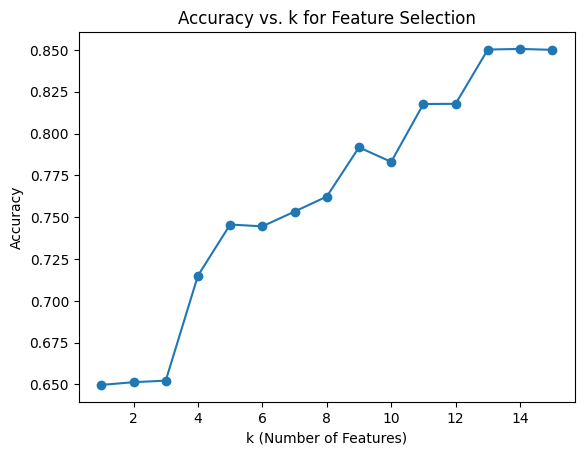

In [137]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, KFold
from tqdm import tqdm
import numpy as np
from sklearn.metrics import make_scorer, f1_score

y = final_features_new['generated'].values
X = final_features_new.drop(columns='generated', errors = 'ignore').values

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize SelectKBest with the f_classif scoring function (for classification problems)
# You can experiment with different scoring functions based on your problem type
k_best = SelectKBest(score_func=f_classif)

# Experiment with different values of k
k_values = range(1, X.shape[1] + 1)

# Lists to store results
accuracy_scores = []

# Loop through different values of k
for k in tqdm(k_values):
    k_best.k = k  # Set the current value of k

    # Use cross_val_score to get the average performance across folds
    f1_scorer = make_scorer(f1_score, average='weighted')
    scores = cross_val_score(LogisticRegression(), k_best.fit_transform(X, y), y, cv=kf, scoring=f1_scorer)

    # Calculate the mean score for the current value of k
    mean_score = np.mean(scores)

    # Append the mean score to the list
    accuracy_scores.append(mean_score)

# Plot the results
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. k for Feature Selection')
plt.xlabel('k (Number of Features)')
plt.ylabel('Accuracy')
plt.show()


In [164]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    LRaccuracy = accuracy_score(y_test, y_pred)
    LRprecision = precision_score(y_test, y_pred)
    LRrecall = recall_score(y_test, y_pred)
    LRf1 = f1_score(y_test, y_pred)
    print('Precision is: ',LRprecision)
    print('Accuracy is: ',LRaccuracy)
    print('Recall is: ',LRrecall)
    print('F1 is: ',LRf1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Precision is:  0.0
Accuracy is:  0.502
Recall is:  0.0
F1 is:  0.0


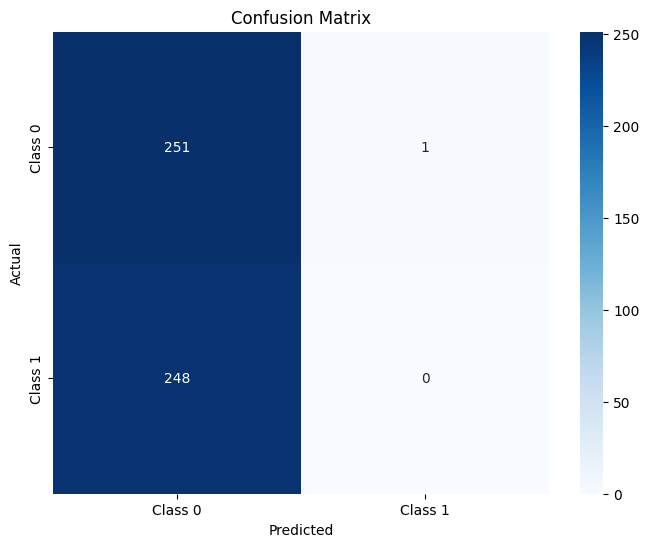

In [165]:

from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

evaluate(gb, X_test, y_test)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision is:  0.0
Accuracy is:  0.504
Recall is:  0.0
F1 is:  0.0


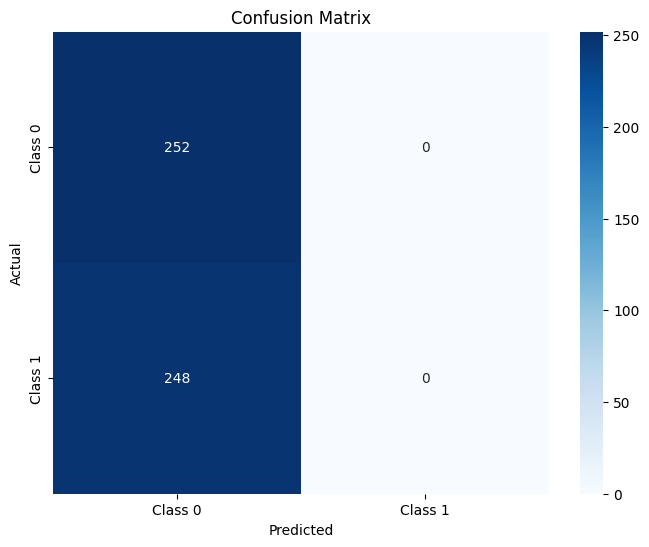

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(verbose=1)
randomForest.fit(X_train, y_train)

evaluate(randomForest, X_test, y_test)
